<h1>REGRESSION</h1>

In [285]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [286]:
data=pd.read_csv('insurance.csv')

In [287]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [288]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [289]:
g = sns.catplot(x='region', y=data['smoker']='yes', kind='bar', data=data)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

SyntaxError: invalid syntax (<ipython-input-289-19e727b5ae86>, line 1)

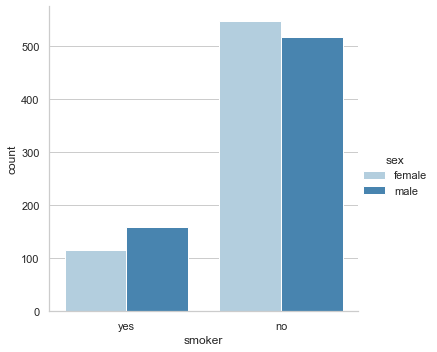

In [290]:


sns.catplot(x="smoker", kind="count",hue = 'sex', palette="Blues", data=data)


In [291]:
#data.groupby(by="region").sum()
#data.groupby('region')['smoker']
pd.crosstab(data['region'],data['smoker']).apply(lambda r: r/r.sum(), axis=1)

smoker,no,yes
region,,
northeast,0.793210,0.206790
northwest,0.821538,0.178462
southeast,0.750000,0.250000
southwest,0.821538,0.178462


In [292]:


data['children'].value_counts()[max(data['children'])]

18

Text(0.5, 1.0, 'Distribution of Charges')

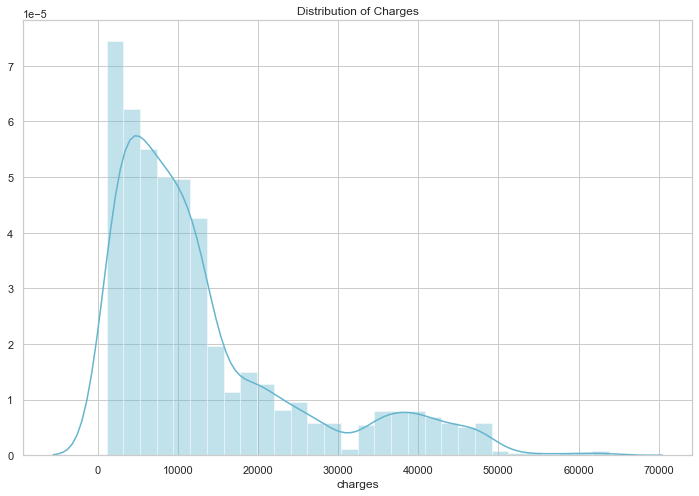

In [293]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

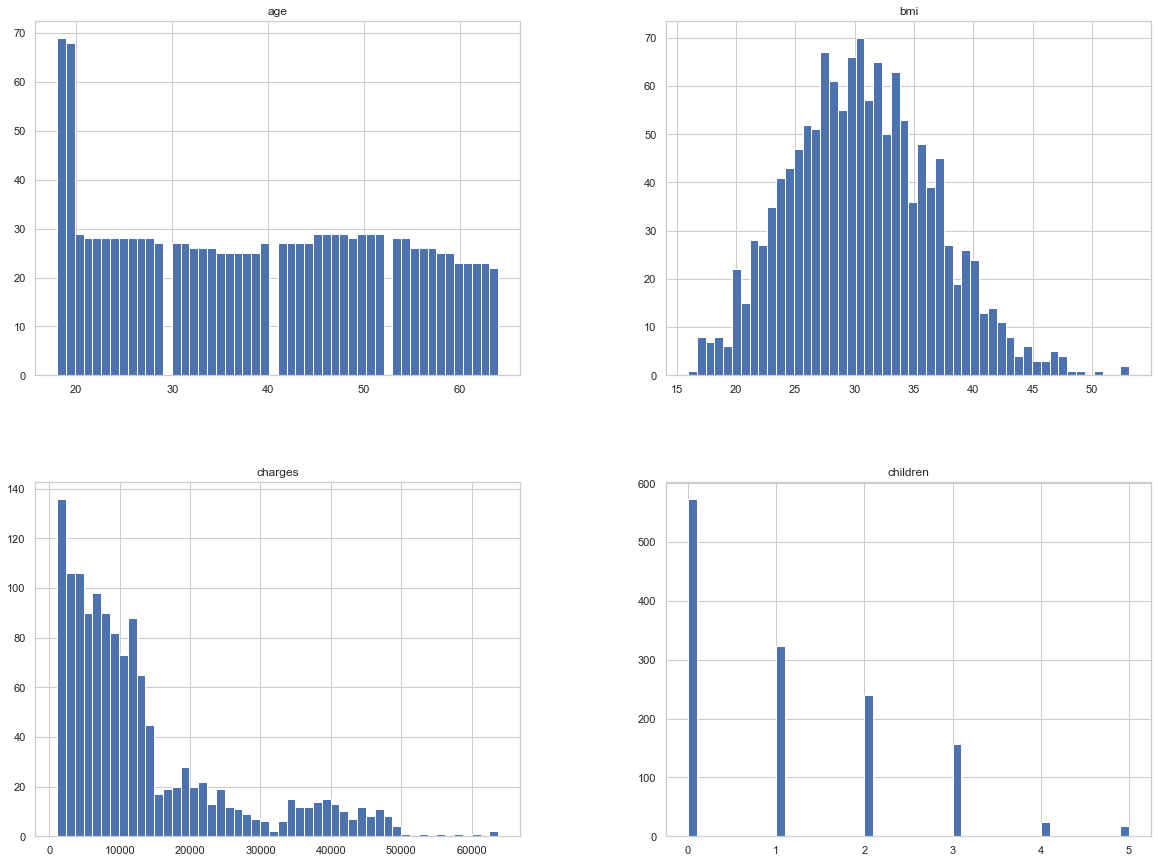

In [294]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

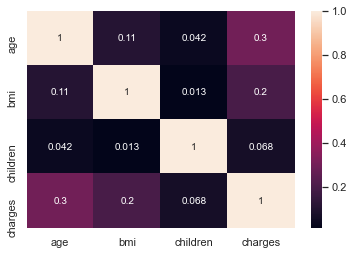

In [295]:


correlation_matrix = data.corr()
sns.heatmap(correlation_matrix , annot=correlation_matrix )
plt.show()

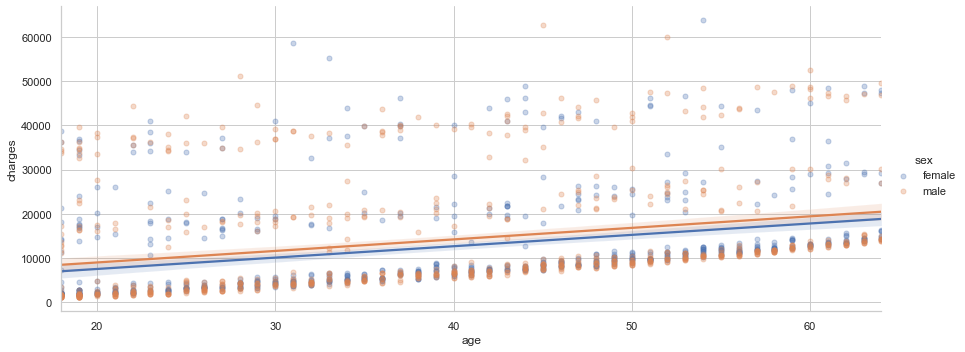

In [296]:
# lmplot : Age vs Charges group by Gender
sns.lmplot(data=data, x='age', y='charges', hue='sex', scatter_kws={"alpha": .3, "s": 25}, aspect=2.5)
##male pay more than female 

(-1.1125534137466335, 1.11124607874182, -1.1207194480801503, 1.100986640384769)

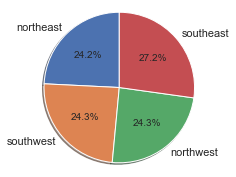

In [297]:
####thare a more people frome southeast that every region
fig = plt.figure(figsize=(3,3))
labels = 'northeast', 'southwest', 'northwest' ,'southeast'
sizes = [len(data[data['region']=='northeast']), len(data[data['region']=='southwest']), len(data[data['region']=='northwest'])
,len(data[data['region']=='southeast'])]

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  

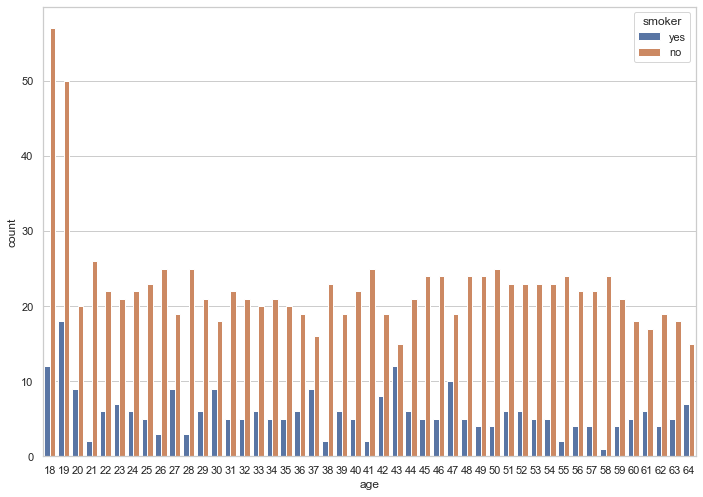

In [298]:
from matplotlib import pyplot
import seaborn
a4_dims = (11.7, 8.27)

fig, ax = pyplot.subplots(figsize=a4_dims)

sns.countplot(x = 'age' , hue = 'smoker' , data = data,)

###  <span style="color:#20B2AA">Features</span> 

<span >
<h10><b style="color:#20B2AA">age -</b> age of primary beneficiary</h10>
    <br>
<h10><b style="color:#20B2AA">sex -</b>  insurance contractor gender, female, male</h10>
    <br>
<h10><b style="color:#20B2AA">bmi-</b> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9</h10>
    <br>
<h10><b style="color:#20B2AA">children -</b> Number of children covered by health insurance / Number of dependents</h10>
    <br>
<h10><b style="color:#20B2AA">smoker - </b>Smoking</h10>
    <br>
<h10><b style="color:#20B2AA">region - </b> the beneficiarys residential area in the US, northeast, southeast, southwest, northwest</h10>
    <br>
<h10><b style="color:#20B2AA">charges - </b> Individual medical costs billed by health insurance</h10>
    <br>



###  <span style="color:#20B2AA"> clening the data</span> 

In [299]:
data.duplicated().any()

True

In [300]:
print(data.shape,"befor delited duplicat  value")
data.drop_duplicates(inplace=True)
print(data.shape,"afer delited duplicat  value")

(1338, 7) befor delited duplicat  value
(1337, 7) afer delited duplicat  value


In [301]:
print(data.isnull().any())
print("Thare are not null value")

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool
Thare are not null value


In [302]:
Dummies

NameError: name 'Dummies' is not defined

In [303]:

print(data.dtypes,'befor that over the object value to demmi')
data = pd.get_dummies(data)
print(data.dtypes,'after that over the object value to demmi')

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object befor that over the object value to demmi
age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object after that over the object value to demmi


In [271]:
##Converting objects labels into categorical
#data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('category')
#data.dtypes


In [272]:
##Converting category labels into numerical using LabelEncoder
#from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()
#label.fit(data.sex.drop_duplicates())
#data.sex = label.transform(data.sex)
#label.fit(data.smoker.drop_duplicates())
#data.smoker = label.transform(data.smoker)
#label.fit(data.region.drop_duplicates())
#data.region = label.transform(data.region)
data.dtypes

age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [273]:
X = data.drop(['charges'], axis = 1)
y = data.charges

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 0)

In [274]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [275]:
minmom=0;
index=1;
model = neighbors.KNeighborsRegressor(n_neighbors = 1)

model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
minmom = sqrt(mean_squared_error(y_test,pred)) #calculate rmse

In [279]:
min=0;
index=1;

rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    if(minmom>=error):
        minmom=error;
        index=K;
    print('RMSE value for k= ' , K , 'is:', error)
print('minimum err for k= ' , minmom , 'is:', index ,'n_neighbors')

RMSE value for k=  1 is: 11676.322047189691
RMSE value for k=  2 is: 10773.717418444021
RMSE value for k=  3 is: 10580.767843963371
RMSE value for k=  4 is: 10186.171224499814
RMSE value for k=  5 is: 10450.6145245098
RMSE value for k=  6 is: 10519.178892938326
RMSE value for k=  7 is: 10611.477404202958
RMSE value for k=  8 is: 10759.86673918436
RMSE value for k=  9 is: 10917.234257041071
RMSE value for k=  10 is: 11023.699399692427
RMSE value for k=  11 is: 11101.906877037443
RMSE value for k=  12 is: 11184.565271728792
RMSE value for k=  13 is: 11202.068365686227
RMSE value for k=  14 is: 11221.891438643725
RMSE value for k=  15 is: 11252.081830084246
RMSE value for k=  16 is: 11328.725900315418
RMSE value for k=  17 is: 11366.151990077899
RMSE value for k=  18 is: 11374.412200086233
RMSE value for k=  19 is: 11360.313537443135
RMSE value for k=  20 is: 11392.945550059281
minimum err for k=  10186.171224499814 is: 4 n_neighbors


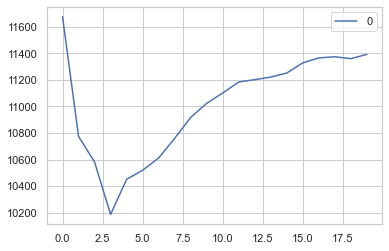

In [280]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

<h5>LinearRegression</h5>



In [239]:
# Training the Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X_train, y_train)

regressor.predict(X_train)
#X_train.reshape((-1, 1))
print(regressor.score(X_train, y_train))
r_sq = regressor.score(X_train,y_train)
print('coefficient of determination:', r_sq)
print('intercept:', regressor.intercept_)

print('slope:', regressor.coef_)


0.7517756833807481
coefficient of determination: 0.7517756833807481
intercept: 716.0474590917038
slope: [   244.37877631    305.17153885    483.60628232    -13.7477464
     13.7477464  -11965.42008182  11965.42008182    565.07281933
    293.85242255   -268.00848132   -590.91676056]


0.7439832307622105

In [240]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(degree=2, include_bias=False)
transformer.fit(X_train)
x_ = transformer.transform(X_train)
model = LinearRegression().fit(x_, y_train)
r_sq = model.score(x_, y_train)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)


coefficient of determination: 0.8490264137385377
intercept: -13322.22116439522
coefficients: [ 1.11361151e+01  4.37525209e+02  5.71118984e+02  2.10013406e+02
 -2.10013406e+02  4.12595458e+03 -4.12595458e+03 -3.11455981e+02
 -4.56018781e+02  6.97285012e+02  7.01897500e+01  2.92988518e+00
  8.28801180e-02 -6.55999027e+00 -7.22841007e+00  1.83645252e+01
  4.43142600e-01  1.06929725e+01 -2.95477061e+01  6.30130159e+00
  1.89855534e+01  1.53969663e+01 -3.48072646e+00 -1.77186868e+00
  2.16787496e+02  2.20737713e+02 -5.38970988e+02  9.76496197e+02
  2.05698046e+02  1.42911729e+02  1.29972530e+01  7.59181816e+01
 -9.44441634e+01  3.89278731e+02  1.81840253e+02  3.25322811e+02
  2.45796173e+02  2.12042979e+02  4.99624647e+02 -9.09589565e-01
 -1.39639052e+02  2.10013406e+02  0.00000000e+00  2.10688251e+03
 -1.89686910e+03  2.85388623e+02 -3.60328585e+02  1.09954767e+02
  1.74998601e+02 -2.10013406e+02  2.01907207e+03 -2.22908548e+03
 -5.96844604e+02 -9.56901958e+01  5.87330245e+02 -1.04808851e+

In [241]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



Coefficients: 
 [   244.37877631    305.17153885    483.60628232    -13.7477464
     13.7477464  -11965.42008182  11965.42008182    565.07281933
    293.85242255   -268.00848132   -590.91676056]
Mean squared error: 40842992.19
Coefficient of determination: 0.74


In [309]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators = 120, criterion = 'mse')

random_forest.fit(X_train , y_train)

forest_train_pred = random_forest.predict(X_train)
forest_test_pred = random_forest.predict(X_test)
(random_forest.score(X_train , y_train) ,random_forest.score(X_test , y_test))

print('MSE train data: %.3f , MSE test data: %.3f' %(mean_squared_error(y_train , forest_train_pred) , 
                                                     mean_squared_error(y_test , forest_test_pred)))


print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))

MSE train data: 3387144.650 , MSE test data: 25488586.712
R2 train data: 0.976, R2 test data: 0.840
